In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
os.chdir('C:\\RESEARCH\\LUAD\\Site') 

In [3]:
X=pd.read_excel('LUAD_Genes_Site.xlsx',index_col=0)

In [4]:
X.shape

(517, 14807)

In [5]:
x=X.iloc[:,0:14805].values
y=X.iloc[:,14806].values

In [6]:
y

array(['R-Lower', 'R-Lower', 'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Lower', 'R-Middle', 'R-Upper', 'R-Lower',
       'R-Upper', 'R-Lower', 'L-Upper', 'L-Lower', 'R-Upper', 'L-Lower',
       'R-Lower', 'L-Lower', 'R-Upper', 'R-Middle', 'L-Lower', 'L-Upper',
       'L-Lower', 'R-Upper', 'L-Lower', 'R-Lower', 'L-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'L-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Lower',
       'L-Upper', 'R-Upper', 'R-Upper', 'R-Lower', 'R-Lower', 'L-Upper',
       'R-Upper', 'L-Lower', 'R-Upper', 'L-Lower', 'L-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper',
       'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper'

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [10]:
# Fitting Kernel SVM to the Validation set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 1, gamma = 0.0001, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [11]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [12]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]) / cm.sum())
accuracy

0.37349397590361444

Confusion Matrix, without normalization
[[ 1  2  0  2  0  3]
 [ 0  6  0  1  0 11]
 [ 0  1  0  0  0  0]
 [ 4  4  0  2  0 10]
 [ 0  0  0  2  0  3]
 [ 2  3  0  4  0 22]]


<Figure size 720x504 with 0 Axes>

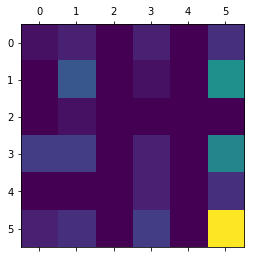

In [33]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.125      0.25       0.         0.25       0.         0.375     ]
 [0.         0.33333333 0.         0.05555556 0.         0.61111111]
 [0.         1.         0.         0.         0.         0.        ]
 [0.2        0.2        0.         0.1        0.         0.5       ]
 [0.         0.         0.         0.4        0.         0.6       ]
 [0.06451613 0.09677419 0.         0.12903226 0.         0.70967742]]


<Figure size 432x288 with 0 Axes>

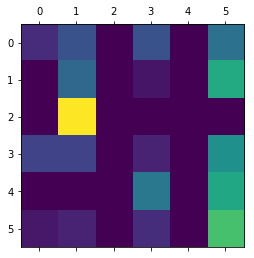

In [34]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [35]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

             precision    recall  f1-score   support

          0       0.14      0.12      0.13         8
          1       0.38      0.33      0.35        18
          2       0.00      0.00      0.00         1
          3       0.18      0.10      0.13        20
          4       0.00      0.00      0.00         5
          5       0.45      0.71      0.55        31

avg / total       0.31      0.37      0.33        83



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.10750923180013923

In [37]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.38642414419335674

In [ ]:
"""
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1, 10, 100, 1000], 'kernel' : ['linear']},
              {'C' : [1, 10, 100, 1000], 'kernel' : ['rbf'], 'gamma' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
